ÌÅ¥ÎûòÏä§: ['blocked', 'free']
Îç∞Ïù¥ÌÑ∞ Ïàò: 60


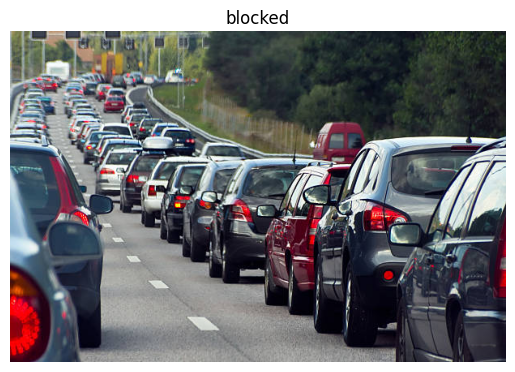

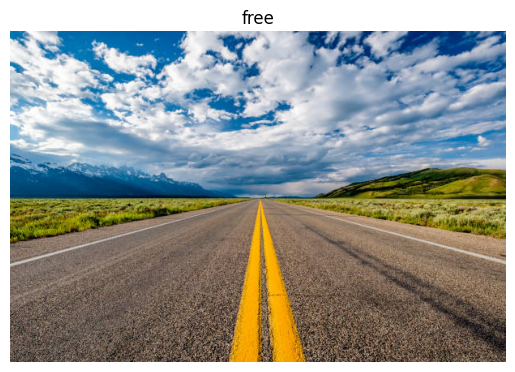

Device: cpu
Epoch 1: Loss=8.37, Accuracy=56.67%
Epoch 2: Loss=5.21, Accuracy=73.33%
Epoch 3: Loss=3.29, Accuracy=80.00%


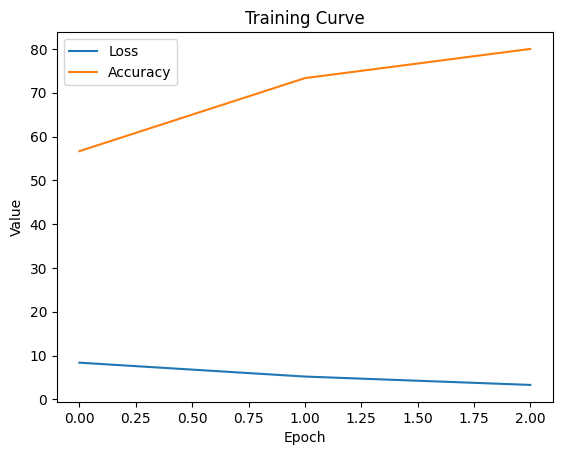

Ïã§Ï†ú ÎùºÎ≤®: free | ÏòàÏ∏°: free


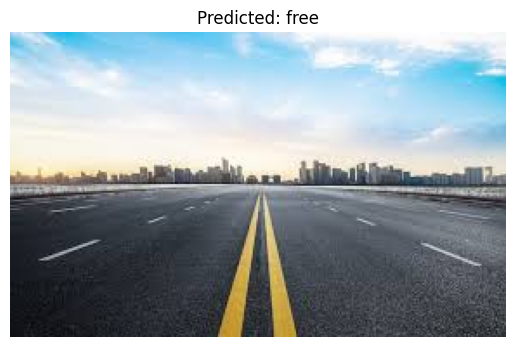

Ï∂îÎ°† ÏÜçÎèÑ: 74.28 FPS


In [3]:
# ============================================
# 0. ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
# ============================================
import os, random, time
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# ============================================
# 1. Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞
# ============================================
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú (Î≥∏Ïù∏ PC Í≤ΩÎ°ú ÎßûÍ≤å ÏàòÏ†ï!)
data_dir = r"C:\Users\ai\Desktop\jetson-nano-project\dataet_classification"

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(data_dir, transform=transform)
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)

print("ÌÅ¥ÎûòÏä§:", dataset.classes)
print("Îç∞Ïù¥ÌÑ∞ Ïàò:", len(dataset))

# ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
for label in dataset.classes:
    path = os.path.join(dataset.root, label)
    sample = random.choice(os.listdir(path))
    img = Image.open(os.path.join(path, sample)).convert("RGB")
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")
    plt.show()

# ============================================
# 2. Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
# ============================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 2)  # free/blocked
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

losses, accs = [], []

for epoch in range(3):  # Ìè¨Ìè¥Ïö© 3epoch
    running_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    acc = 100. * correct / total
    losses.append(running_loss)
    accs.append(acc)
    print(f"Epoch {epoch+1}: Loss={running_loss:.2f}, Accuracy={acc:.2f}%")

# ============================================
# 3. ÌïôÏäµ Í≥°ÏÑ† ÏãúÍ∞ÅÌôî
# ============================================
plt.plot(losses, label="Loss")
plt.plot(accs, label="Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Training Curve")
plt.show()

# ============================================
# 4. Ï∂îÎ°† ÌÖåÏä§Ìä∏
# ============================================
model.eval()
img_path, label = dataset.samples[random.randint(0, len(dataset)-1)]
img = Image.open(img_path).convert("RGB")

input_img = transform(img).unsqueeze(0).to(device)

with torch.no_grad():
    output = model(input_img)
    pred = torch.argmax(output, 1).item()

print("Ïã§Ï†ú ÎùºÎ≤®:", dataset.classes[label], "| ÏòàÏ∏°:", dataset.classes[pred])

plt.imshow(img)
plt.title(f"Predicted: {dataset.classes[pred]}")
plt.axis("off")
plt.show()

# ============================================
# 5. FPS Ï∏°Ï†ï (ÏòµÏÖò)
# ============================================
dummy_input = torch.randn(1, 3, 224, 224).to(device)

start = time.time()
for _ in range(100):
    _ = model(dummy_input)
end = time.time()

fps = 100 / (end - start)
print(f"Ï∂îÎ°† ÏÜçÎèÑ: {fps:.2f} FPS")


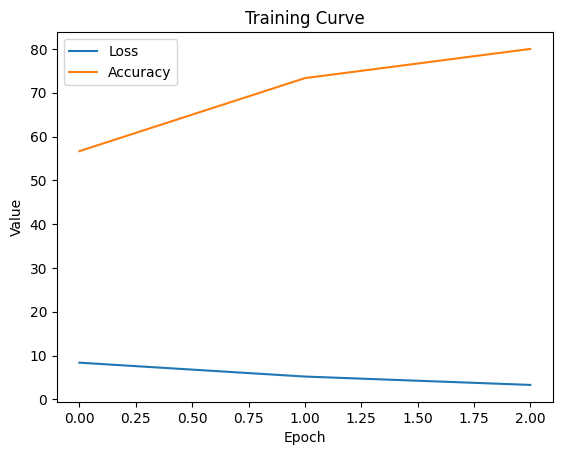

In [4]:
import matplotlib.pyplot as plt

plt.plot(losses, label="Loss")
plt.plot(accs, label="Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Training Curve")
plt.show()


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import csv

# Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ΩÎ°ú
data_dir = r"C:\Users\ai\Desktop\jetson-nano-project\dataet_classification"

# Ï†ÑÏ≤òÎ¶¨
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

# Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
dataset = datasets.ImageFolder(data_dir, transform=transform)
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)

# Ïû•Ïπò ÏÑ§Ï†ï
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ResNet18 Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 2)  # free/blocked 2ÌÅ¥ÎûòÏä§
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# CSV ÌååÏùº ÏÉùÏÑ±
csv_file = open("train_log.csv", mode="w", newline="")
csv_writer = csv.writer(csv_file)

# ÌïôÏäµ
for epoch in range(5):  # ÏòàÏãúÎ°ú 5 epoch
    running_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    acc = 100. * correct / total
    avg_loss = running_loss / len(train_loader)

    # CSVÏóê [loss, acc] Ï†ÄÏû•
    csv_writer.writerow([avg_loss, acc])

    print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Accuracy={acc:.2f}%")

csv_file.close()


Device: cpu
Epoch 1: Loss=1.4145, Accuracy=58.33%
Epoch 2: Loss=0.5825, Accuracy=70.00%
Epoch 3: Loss=0.3092, Accuracy=85.00%
Epoch 4: Loss=0.3081, Accuracy=85.00%
Epoch 5: Loss=0.2507, Accuracy=86.67%


In [7]:
# ÌïôÏäµ ÎÅùÎÇú ÌõÑ Ï∂îÍ∞Ä
torch.save(model.state_dict(), "model.pth")
print("‚úÖ Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å: model.pth")


‚úÖ Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å: model.pth


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

# ÌÅ¥ÎûòÏä§ Ï†ïÏùò
classes = ["free", "blocked"]

# Ï†ÑÏ≤òÎ¶¨ (ÌïôÏäµ ÎïåÎûë ÎòëÍ∞ôÏù¥!)
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 2)
model.load_state_dict(torch.load("model.pth", map_location=torch.device('cpu')))
model.eval()

def predict(image_path):
    img = Image.open(image_path).convert("RGB")
    input_tensor = transform(img).unsqueeze(0)  # Î∞∞Ïπò Ï∞®Ïõê Ï∂îÍ∞Ä
    with torch.no_grad():
        output = model(input_tensor)
        _, pred = output.max(1)
    return classes[pred.item()]

# Ïã§Ìñâ ÏòàÏãú
if __name__ == "__main__":
    test_img = r"C:\Users\ai\Desktop\jetson-nano-project\dataet_classification\blocked\blocked_001.jpg"
    result = predict(test_img)
    print(f"ÏòàÏ∏° Í≤∞Í≥º: {result}")


ÏòàÏ∏° Í≤∞Í≥º: blocked


In [ ]:
import os
import random
from PIL import Image
import torch
import torch.nn as nn
from torchvision import models, transforms

# ---- Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ ----
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 2)  # free, blocked 2ÌÅ¥ÎûòÏä§
model.load_state_dict(torch.load("model.pth", map_location=device))  # Ï†ÄÏû•Îêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model.eval()

# ---- ÌÅ¥ÎûòÏä§ ÎùºÎ≤® ----
classes = ["free", "blocked"]

# ---- Ï†ÑÏ≤òÎ¶¨ ----
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

# ---- ÏòàÏ∏° Ìï®Ïàò ----
def predict(image_path):
    img = Image.open(image_path).convert("RGB")
    input_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        _, pred = torch.max(output, 1)
    return classes[pred.item()]

# ---- ÎûúÎç§ ÌÖåÏä§Ìä∏ ----
def run_simulation(num_samples=5):
    base_dir = r"C:\Users\ai\Desktop\jetson-nano-project\dataet_classification"
    all_images = []

    for label in classes:
        folder = os.path.join(base_dir, label)
        files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith((".jpg", ".png"))]
        all_images.extend(files)

    samples = random.sample(all_images, num_samples)

    for img_path in samples:
        result = predict(img_path)
        print(f"{os.path.basename(img_path)} ‚Üí ÏòàÏ∏° Í≤∞Í≥º: {result}")

# Ïã§Ìñâ
if __name__ == "__main__":
    run_simulation(60)  # nÏû• ÌÖåÏä§Ìä∏


blocked_024.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
blocked_019.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
free_008.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
blocked_018.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
blocked_029.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
blocked_025.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
free_026.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
blocked_008.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: free
blocked_012.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: free
blocked_007.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
blocked_028.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
free_013.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
free_024.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
free_018.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
free_005.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
blocked_003.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
blocked_004.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
blocked_027.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
blocked_023.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
free_030.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
free_022.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
blocked_006.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
free_020.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
free_009.jpg ‚Üí ÏòàÏ∏° Í≤∞Í≥º: blocked
free

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
import os

# ======================
# Í≤ΩÎ°ú ÏÑ§Ï†ï
# ======================
data_dir = r"C:\Users\ai\Desktop\jetson-nano-project\dataet_classification"

# ======================
# Transform (ImageNet Í∏∞Ï§Ä Normalize Ï∂îÍ∞Ä)
# ======================
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ======================
# Dataset / Dataloader
# ======================
dataset = datasets.ImageFolder(data_dir, transform=transform)
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)

classes = dataset.classes
print("ÌÅ¥ÎûòÏä§:", classes)
print("Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:", len(dataset))

# ======================
# Device
# ======================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ======================
# Î™®Îç∏ Ï†ïÏùò (ResNet18)
# ======================
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 2)  # free/blocked
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ======================
# ÌïôÏäµ
# ======================
losses, accs = [], []
y_true_all, y_pred_all = [], []

for epoch in range(30):  # ‚úÖ 30 epoch
    running_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        y_true_all.extend(labels.cpu().numpy())
        y_pred_all.extend(predicted.cpu().numpy())

    acc = 100. * correct / total
    losses.append(running_loss)
    accs.append(acc)
    print(f"Epoch {epoch+1}: Loss={running_loss:.4f}, Accuracy={acc:.2f}%")

# ======================
# ÌÅ¥ÎûòÏä§Î≥Ñ ÏÑ±Îä• Î¶¨Ìè¨Ìä∏
# ======================
print("\nüìä Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=classes))

# ======================
# Î™®Îç∏ Ï†ÄÏû•
# ======================
torch.save(model.state_dict(), "resnet18_free_blocked.pth")
print("\n‚úÖ Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å: resnet18_free_blocked.pth")


ÌÅ¥ÎûòÏä§: ['blocked', 'free']
Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 60
Device: cpu


c:\Users\ai\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ai\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1: Loss=10.4044, Accuracy=70.00%
Epoch 2: Loss=5.6709, Accuracy=73.33%
Epoch 3: Loss=3.1766, Accuracy=81.67%
Epoch 4: Loss=3.0487, Accuracy=86.67%
Epoch 5: Loss=2.1984, Accuracy=86.67%


KeyboardInterrupt: 

In [ ]:
import sys
import torch
import torch.nn as nn
from torchvision import transforms, models
from PIL import Image

# ======================
# Î™®Îç∏ Î°úÎìú
# ======================
model_path = r"C:\Users\ai\Desktop\jetson-nano-project\notebooks\model.pth"  # Ï†ÄÏû•Ìïú Î™®Îç∏ Í≤ΩÎ°ú
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ResNet18 Î™®Îç∏ Ï†ïÏùò
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 2)  # free / blocked
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

# ======================
# Î≥ÄÌôò Ï†ïÏùò
# ======================
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# ======================
# ÏòàÏ∏° Ìï®Ïàò
# ======================
def predict(image_path):
    img = Image.open(image_path).convert("RGB")
    input_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        _, predicted = torch.max(output, 1)

    classes = ["blocked", "free"]
    return classes[predicted.item()]

# ======================
# Î©îÏù∏ Ïã§ÌñâÎ∂Ä (WinFormsÏóêÏÑú Ìò∏Ï∂ú)
# ======================
if __name__ == "__main__":
    if len(sys.argv) < 2:
        # JupyterÏóêÏÑú ÌÖåÏä§Ìä∏Ìï† ÎïåÎäî ÏßÅÏ†ë Í≤ΩÎ°ú ÎÑ£Ïñ¥Ï§å
        test_img = r"C:\Users\ai\Desktop\jetson-nano-project\dataset_classification\free\free_001.jpg"
        result = predict(test_img)
    else:
        image_path = sys.argv[1]
        result = predict(image_path)

    print(result)


OSError: [Errno 22] Invalid argument: '--f=c:\\Users\\ai\\AppData\\Roaming\\jupyter\\runtime\\kernel-v3e4991077bc5ee0e9620fc7f46e11e13b0c00e50e.json'